# Deep Neural Networks 
## Lecture 07

## Implementation of Perceptron using Tensor Flow


## 1. Import Statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,classification_report
 
import tensorflow as tf

%matplotlib inline

2023-11-23 17:35:46.330142: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-23 17:35:46.334549: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-23 17:35:46.393551: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-23 17:35:46.394653: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-23 17:35:47.305945: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
# gpus = tf.config.list_physical_devices('GPU')
# try: 
#     for g in gpus:
#         tf.config.experimental.set_memory_growth(g,True)
#     logical_gpus = tf.config.list_logical_devices('GPU')
#     print(len(gpus),'Physical GPUs',len(logical_gpus),'Logical GPUs')
# except:
#     print("Invalid Device")

## 2. Setup Global Parameters

In [3]:
###----------------
### Some parameters
###----------------

# Directory locations
inpDir = '../../input'
outDir = '../output'

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 1000 # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [4]:
X,y = datasets.make_moons(n_samples=N_SAMPLES,shuffle=True,noise=NOISE,random_state=RANDOM_STATE)
X.shape,y.shape

((1000, 2), (1000,))

In [5]:
data_df=pd.DataFrame(X,columns=['A','B'])
data_df['target']=y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [7]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,1000.0,0.490841,0.898951,-1.688795,-0.149565,0.500100,1.095048,2.419113
B,1000.0,0.239025,0.540082,-0.955280,-0.205090,0.241163,0.680394,1.612075
target,1000.0,0.500000,0.500250,0.000000,0.000000,0.500000,1.000000,1.000000


In [8]:
data_df['target'].unique()

array([0, 1])

### 4.1 Different ways of plotting data

<Axes: xlabel='A', ylabel='B'>

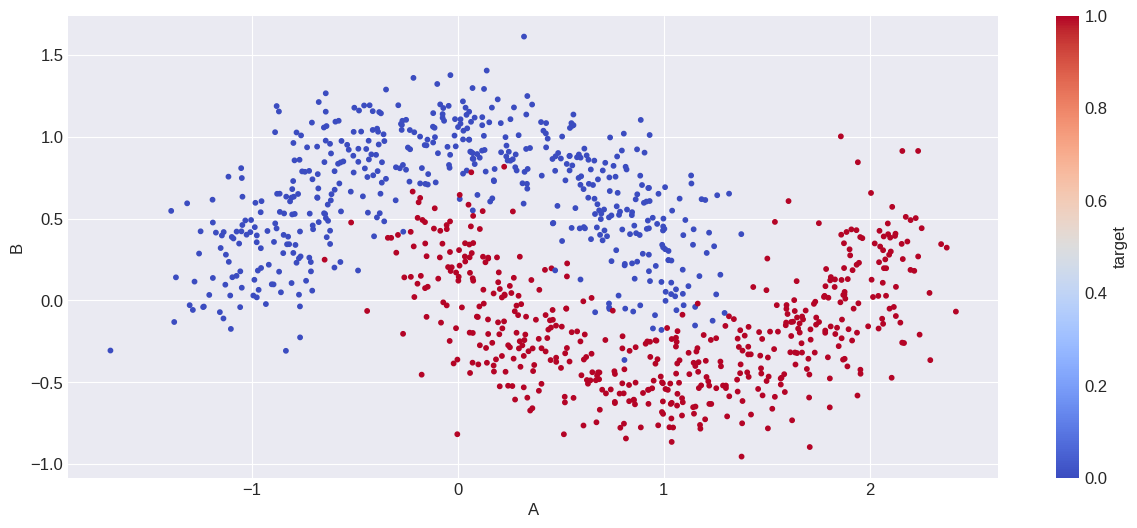

In [9]:
data_df.plot.scatter('A','B',s=10,c='target',cmap=CMAP)

<Axes: xlabel='target'>

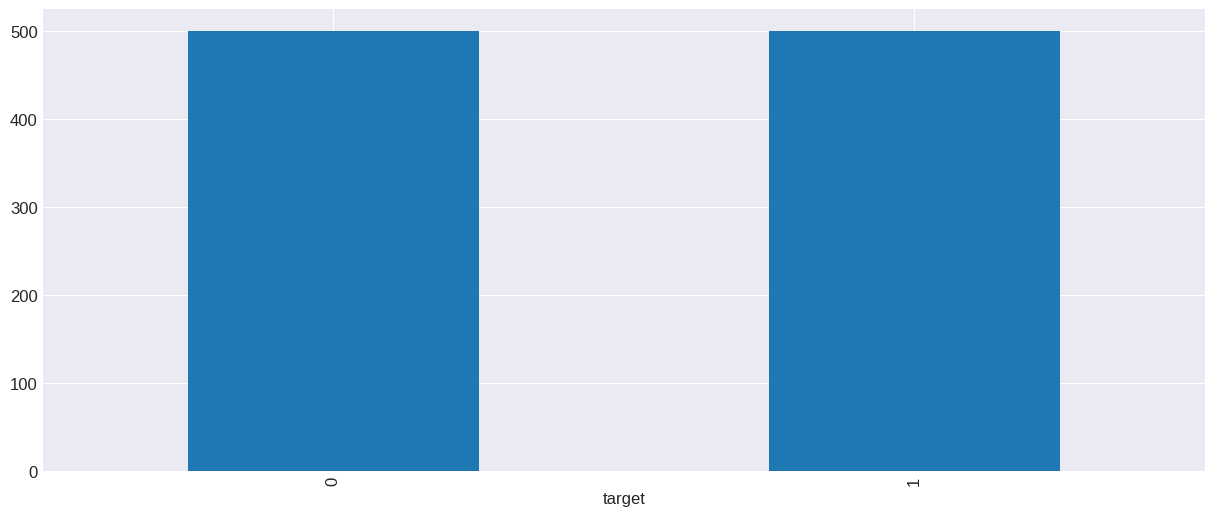

In [10]:
data_df['target'].value_counts().plot(kind='bar')

/home/dai/anaconda3/envs/DNN/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dai/anaconda3/envs/DNN/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dai/anaconda3/envs/DNN/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dai/anaconda3/envs/DNN/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

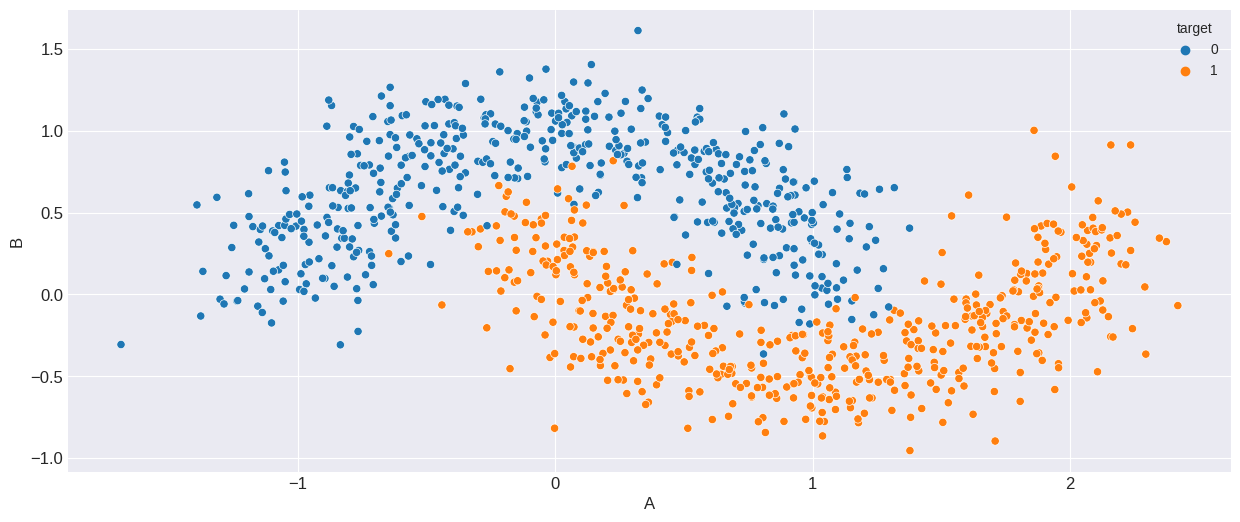

In [11]:
sns.scatterplot(x='A',y='B',data=data_df,hue='target');

<div style="font-family: Arial; font-size:1.2em;">
    We will keep 10%, i.e. 100 records for testing and remaining records will be used in training. Note that the data is already random.
</div>

#### test Train Split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=TEST_SIZE,stratify=y,random_state=RANDOM_STATE)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

### Model

In [13]:
# building the model with one Layer using Tensorflow with one hidden Layer(having 4 neuron).

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='tanh'),     # Hidden Layer with four nodes
    tf.keras.layers.Dense(2)                        # Output Layer with two nodes
])

#### Loss function

In [15]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [16]:
model.compile(optimizer='rmsprop',
              loss=loss_fn,
              metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train,
                     validation_data=[X_test,y_test],
                     epochs=EPOCHS,
                     verbose=2)

Epoch 1/1000
25/25 - 1s - loss: 0.4868 - accuracy: 0.8462 - val_loss: 0.4743 - val_accuracy: 0.8300 - 933ms/epoch - 37ms/step
Epoch 2/1000
25/25 - 0s - loss: 0.4679 - accuracy: 0.8475 - val_loss: 0.4571 - val_accuracy: 0.8300 - 147ms/epoch - 6ms/step
Epoch 3/1000
25/25 - 0s - loss: 0.4509 - accuracy: 0.8475 - val_loss: 0.4407 - val_accuracy: 0.8300 - 145ms/epoch - 6ms/step
Epoch 4/1000
25/25 - 0s - loss: 0.4350 - accuracy: 0.8487 - val_loss: 0.4259 - val_accuracy: 0.8300 - 141ms/epoch - 6ms/step
Epoch 5/1000
25/25 - 0s - loss: 0.4200 - accuracy: 0.8525 - val_loss: 0.4119 - val_accuracy: 0.8300 - 141ms/epoch - 6ms/step
Epoch 6/1000
25/25 - 0s - loss: 0.4059 - accuracy: 0.8512 - val_loss: 0.3994 - val_accuracy: 0.8300 - 134ms/epoch - 5ms/step
Epoch 7/1000
25/25 - 0s - loss: 0.3925 - accuracy: 0.8537 - val_loss: 0.3871 - val_accuracy: 0.8300 - 134ms/epoch - 5ms/step
Epoch 8/1000
25/25 - 0s - loss: 0.3801 - accuracy: 0.8575 - val_loss: 0.3762 - val_accuracy: 0.8350 - 133ms/epoch - 5ms/step

25/25 - 0s - loss: 0.2832 - accuracy: 0.8775 - val_loss: 0.2991 - val_accuracy: 0.8650 - 149ms/epoch - 6ms/step
Epoch 67/1000
25/25 - 0s - loss: 0.2827 - accuracy: 0.8800 - val_loss: 0.2989 - val_accuracy: 0.8700 - 134ms/epoch - 5ms/step
Epoch 68/1000
25/25 - 0s - loss: 0.2823 - accuracy: 0.8800 - val_loss: 0.2985 - val_accuracy: 0.8700 - 135ms/epoch - 5ms/step
Epoch 69/1000
25/25 - 0s - loss: 0.2816 - accuracy: 0.8800 - val_loss: 0.2979 - val_accuracy: 0.8650 - 142ms/epoch - 6ms/step
Epoch 70/1000
25/25 - 0s - loss: 0.2814 - accuracy: 0.8788 - val_loss: 0.2974 - val_accuracy: 0.8650 - 141ms/epoch - 6ms/step
Epoch 71/1000
25/25 - 0s - loss: 0.2808 - accuracy: 0.8800 - val_loss: 0.2967 - val_accuracy: 0.8700 - 147ms/epoch - 6ms/step
Epoch 72/1000
25/25 - 0s - loss: 0.2803 - accuracy: 0.8813 - val_loss: 0.2961 - val_accuracy: 0.8700 - 144ms/epoch - 6ms/step
Epoch 73/1000
25/25 - 0s - loss: 0.2798 - accuracy: 0.8813 - val_loss: 0.2958 - val_accuracy: 0.8700 - 156ms/epoch - 6ms/step
Epoch 

Epoch 131/1000
25/25 - 0s - loss: 0.2269 - accuracy: 0.9050 - val_loss: 0.2474 - val_accuracy: 0.9100 - 130ms/epoch - 5ms/step
Epoch 132/1000
25/25 - 0s - loss: 0.2257 - accuracy: 0.9062 - val_loss: 0.2463 - val_accuracy: 0.9100 - 132ms/epoch - 5ms/step
Epoch 133/1000
25/25 - 0s - loss: 0.2247 - accuracy: 0.9075 - val_loss: 0.2453 - val_accuracy: 0.9100 - 136ms/epoch - 5ms/step
Epoch 134/1000
25/25 - 0s - loss: 0.2234 - accuracy: 0.9075 - val_loss: 0.2439 - val_accuracy: 0.9100 - 149ms/epoch - 6ms/step
Epoch 135/1000
25/25 - 0s - loss: 0.2223 - accuracy: 0.9075 - val_loss: 0.2431 - val_accuracy: 0.9150 - 134ms/epoch - 5ms/step
Epoch 136/1000
25/25 - 0s - loss: 0.2214 - accuracy: 0.9075 - val_loss: 0.2416 - val_accuracy: 0.9100 - 142ms/epoch - 6ms/step
Epoch 137/1000
25/25 - 0s - loss: 0.2202 - accuracy: 0.9075 - val_loss: 0.2401 - val_accuracy: 0.9100 - 133ms/epoch - 5ms/step
Epoch 138/1000
25/25 - 0s - loss: 0.2191 - accuracy: 0.9075 - val_loss: 0.2393 - val_accuracy: 0.9100 - 136ms/e

Epoch 196/1000
25/25 - 0s - loss: 0.1669 - accuracy: 0.9325 - val_loss: 0.1863 - val_accuracy: 0.9350 - 140ms/epoch - 6ms/step
Epoch 197/1000
25/25 - 0s - loss: 0.1662 - accuracy: 0.9337 - val_loss: 0.1860 - val_accuracy: 0.9350 - 138ms/epoch - 6ms/step
Epoch 198/1000
25/25 - 0s - loss: 0.1655 - accuracy: 0.9337 - val_loss: 0.1853 - val_accuracy: 0.9350 - 134ms/epoch - 5ms/step
Epoch 199/1000
25/25 - 0s - loss: 0.1647 - accuracy: 0.9337 - val_loss: 0.1844 - val_accuracy: 0.9350 - 142ms/epoch - 6ms/step
Epoch 200/1000
25/25 - 0s - loss: 0.1641 - accuracy: 0.9337 - val_loss: 0.1837 - val_accuracy: 0.9450 - 140ms/epoch - 6ms/step
Epoch 201/1000
25/25 - 0s - loss: 0.1632 - accuracy: 0.9337 - val_loss: 0.1834 - val_accuracy: 0.9400 - 135ms/epoch - 5ms/step
Epoch 202/1000
25/25 - 0s - loss: 0.1627 - accuracy: 0.9337 - val_loss: 0.1825 - val_accuracy: 0.9450 - 140ms/epoch - 6ms/step
Epoch 203/1000
25/25 - 0s - loss: 0.1620 - accuracy: 0.9325 - val_loss: 0.1824 - val_accuracy: 0.9400 - 139ms/e

Epoch 261/1000
25/25 - 0s - loss: 0.1320 - accuracy: 0.9450 - val_loss: 0.1539 - val_accuracy: 0.9550 - 142ms/epoch - 6ms/step
Epoch 262/1000
25/25 - 0s - loss: 0.1316 - accuracy: 0.9450 - val_loss: 0.1540 - val_accuracy: 0.9550 - 138ms/epoch - 6ms/step
Epoch 263/1000
25/25 - 0s - loss: 0.1313 - accuracy: 0.9463 - val_loss: 0.1542 - val_accuracy: 0.9550 - 151ms/epoch - 6ms/step
Epoch 264/1000
25/25 - 0s - loss: 0.1310 - accuracy: 0.9450 - val_loss: 0.1532 - val_accuracy: 0.9550 - 137ms/epoch - 5ms/step
Epoch 265/1000
25/25 - 0s - loss: 0.1304 - accuracy: 0.9450 - val_loss: 0.1526 - val_accuracy: 0.9550 - 133ms/epoch - 5ms/step
Epoch 266/1000
25/25 - 0s - loss: 0.1301 - accuracy: 0.9450 - val_loss: 0.1516 - val_accuracy: 0.9600 - 135ms/epoch - 5ms/step
Epoch 267/1000
25/25 - 0s - loss: 0.1297 - accuracy: 0.9463 - val_loss: 0.1519 - val_accuracy: 0.9600 - 130ms/epoch - 5ms/step
Epoch 268/1000
25/25 - 0s - loss: 0.1295 - accuracy: 0.9475 - val_loss: 0.1518 - val_accuracy: 0.9600 - 129ms/e

Epoch 326/1000
25/25 - 0s - loss: 0.1123 - accuracy: 0.9613 - val_loss: 0.1399 - val_accuracy: 0.9650 - 128ms/epoch - 5ms/step
Epoch 327/1000
25/25 - 0s - loss: 0.1122 - accuracy: 0.9600 - val_loss: 0.1399 - val_accuracy: 0.9650 - 159ms/epoch - 6ms/step
Epoch 328/1000
25/25 - 0s - loss: 0.1119 - accuracy: 0.9600 - val_loss: 0.1394 - val_accuracy: 0.9650 - 134ms/epoch - 5ms/step
Epoch 329/1000
25/25 - 0s - loss: 0.1116 - accuracy: 0.9600 - val_loss: 0.1389 - val_accuracy: 0.9650 - 129ms/epoch - 5ms/step
Epoch 330/1000
25/25 - 0s - loss: 0.1114 - accuracy: 0.9600 - val_loss: 0.1390 - val_accuracy: 0.9650 - 135ms/epoch - 5ms/step
Epoch 331/1000
25/25 - 0s - loss: 0.1110 - accuracy: 0.9600 - val_loss: 0.1374 - val_accuracy: 0.9650 - 125ms/epoch - 5ms/step
Epoch 332/1000
25/25 - 0s - loss: 0.1109 - accuracy: 0.9600 - val_loss: 0.1376 - val_accuracy: 0.9650 - 140ms/epoch - 6ms/step
Epoch 333/1000
25/25 - 0s - loss: 0.1107 - accuracy: 0.9600 - val_loss: 0.1377 - val_accuracy: 0.9650 - 148ms/e

Epoch 391/1000
25/25 - 0s - loss: 0.1004 - accuracy: 0.9663 - val_loss: 0.1334 - val_accuracy: 0.9650 - 144ms/epoch - 6ms/step
Epoch 392/1000
25/25 - 0s - loss: 0.1002 - accuracy: 0.9663 - val_loss: 0.1333 - val_accuracy: 0.9650 - 140ms/epoch - 6ms/step
Epoch 393/1000
25/25 - 0s - loss: 0.1000 - accuracy: 0.9663 - val_loss: 0.1327 - val_accuracy: 0.9650 - 123ms/epoch - 5ms/step
Epoch 394/1000
25/25 - 0s - loss: 0.0999 - accuracy: 0.9663 - val_loss: 0.1333 - val_accuracy: 0.9650 - 136ms/epoch - 5ms/step
Epoch 395/1000
25/25 - 0s - loss: 0.0997 - accuracy: 0.9675 - val_loss: 0.1327 - val_accuracy: 0.9650 - 141ms/epoch - 6ms/step
Epoch 396/1000
25/25 - 0s - loss: 0.0995 - accuracy: 0.9663 - val_loss: 0.1321 - val_accuracy: 0.9650 - 126ms/epoch - 5ms/step
Epoch 397/1000
25/25 - 0s - loss: 0.0995 - accuracy: 0.9663 - val_loss: 0.1330 - val_accuracy: 0.9650 - 147ms/epoch - 6ms/step
Epoch 398/1000
25/25 - 0s - loss: 0.0994 - accuracy: 0.9663 - val_loss: 0.1328 - val_accuracy: 0.9650 - 139ms/e

Epoch 456/1000
25/25 - 0s - loss: 0.0922 - accuracy: 0.9675 - val_loss: 0.1331 - val_accuracy: 0.9700 - 131ms/epoch - 5ms/step
Epoch 457/1000
25/25 - 0s - loss: 0.0919 - accuracy: 0.9688 - val_loss: 0.1338 - val_accuracy: 0.9650 - 135ms/epoch - 5ms/step
Epoch 458/1000
25/25 - 0s - loss: 0.0918 - accuracy: 0.9712 - val_loss: 0.1327 - val_accuracy: 0.9700 - 134ms/epoch - 5ms/step
Epoch 459/1000
25/25 - 0s - loss: 0.0917 - accuracy: 0.9700 - val_loss: 0.1327 - val_accuracy: 0.9700 - 131ms/epoch - 5ms/step
Epoch 460/1000
25/25 - 0s - loss: 0.0916 - accuracy: 0.9688 - val_loss: 0.1334 - val_accuracy: 0.9700 - 142ms/epoch - 6ms/step
Epoch 461/1000
25/25 - 0s - loss: 0.0916 - accuracy: 0.9675 - val_loss: 0.1330 - val_accuracy: 0.9700 - 140ms/epoch - 6ms/step
Epoch 462/1000
25/25 - 0s - loss: 0.0915 - accuracy: 0.9700 - val_loss: 0.1333 - val_accuracy: 0.9700 - 138ms/epoch - 6ms/step
Epoch 463/1000
25/25 - 0s - loss: 0.0914 - accuracy: 0.9700 - val_loss: 0.1323 - val_accuracy: 0.9700 - 138ms/e

Epoch 521/1000
25/25 - 0s - loss: 0.0859 - accuracy: 0.9700 - val_loss: 0.1329 - val_accuracy: 0.9700 - 134ms/epoch - 5ms/step
Epoch 522/1000
25/25 - 0s - loss: 0.0856 - accuracy: 0.9712 - val_loss: 0.1341 - val_accuracy: 0.9650 - 133ms/epoch - 5ms/step
Epoch 523/1000
25/25 - 0s - loss: 0.0858 - accuracy: 0.9700 - val_loss: 0.1329 - val_accuracy: 0.9700 - 139ms/epoch - 6ms/step
Epoch 524/1000
25/25 - 0s - loss: 0.0854 - accuracy: 0.9688 - val_loss: 0.1340 - val_accuracy: 0.9650 - 139ms/epoch - 6ms/step
Epoch 525/1000
25/25 - 0s - loss: 0.0855 - accuracy: 0.9712 - val_loss: 0.1335 - val_accuracy: 0.9700 - 134ms/epoch - 5ms/step
Epoch 526/1000
25/25 - 0s - loss: 0.0853 - accuracy: 0.9700 - val_loss: 0.1328 - val_accuracy: 0.9700 - 133ms/epoch - 5ms/step
Epoch 527/1000
25/25 - 0s - loss: 0.0853 - accuracy: 0.9700 - val_loss: 0.1331 - val_accuracy: 0.9700 - 136ms/epoch - 5ms/step
Epoch 528/1000
25/25 - 0s - loss: 0.0852 - accuracy: 0.9712 - val_loss: 0.1330 - val_accuracy: 0.9700 - 92ms/ep

Epoch 586/1000
25/25 - 0s - loss: 0.0809 - accuracy: 0.9725 - val_loss: 0.1353 - val_accuracy: 0.9600 - 138ms/epoch - 6ms/step
Epoch 587/1000
25/25 - 0s - loss: 0.0809 - accuracy: 0.9725 - val_loss: 0.1349 - val_accuracy: 0.9650 - 118ms/epoch - 5ms/step
Epoch 588/1000
25/25 - 0s - loss: 0.0809 - accuracy: 0.9712 - val_loss: 0.1346 - val_accuracy: 0.9650 - 136ms/epoch - 5ms/step
Epoch 589/1000
25/25 - 0s - loss: 0.0808 - accuracy: 0.9712 - val_loss: 0.1350 - val_accuracy: 0.9600 - 149ms/epoch - 6ms/step
Epoch 590/1000
25/25 - 0s - loss: 0.0806 - accuracy: 0.9712 - val_loss: 0.1337 - val_accuracy: 0.9700 - 140ms/epoch - 6ms/step
Epoch 591/1000
25/25 - 0s - loss: 0.0808 - accuracy: 0.9737 - val_loss: 0.1349 - val_accuracy: 0.9650 - 137ms/epoch - 5ms/step
Epoch 592/1000
25/25 - 0s - loss: 0.0805 - accuracy: 0.9725 - val_loss: 0.1355 - val_accuracy: 0.9600 - 140ms/epoch - 6ms/step
Epoch 593/1000
25/25 - 0s - loss: 0.0807 - accuracy: 0.9700 - val_loss: 0.1358 - val_accuracy: 0.9600 - 140ms/e

Epoch 651/1000
25/25 - 0s - loss: 0.0774 - accuracy: 0.9737 - val_loss: 0.1376 - val_accuracy: 0.9600 - 131ms/epoch - 5ms/step
Epoch 652/1000
25/25 - 0s - loss: 0.0774 - accuracy: 0.9750 - val_loss: 0.1378 - val_accuracy: 0.9600 - 129ms/epoch - 5ms/step
Epoch 653/1000
25/25 - 0s - loss: 0.0773 - accuracy: 0.9737 - val_loss: 0.1389 - val_accuracy: 0.9600 - 129ms/epoch - 5ms/step
Epoch 654/1000
25/25 - 0s - loss: 0.0773 - accuracy: 0.9750 - val_loss: 0.1394 - val_accuracy: 0.9600 - 133ms/epoch - 5ms/step
Epoch 655/1000
25/25 - 0s - loss: 0.0774 - accuracy: 0.9737 - val_loss: 0.1377 - val_accuracy: 0.9600 - 131ms/epoch - 5ms/step
Epoch 656/1000
25/25 - 0s - loss: 0.0772 - accuracy: 0.9737 - val_loss: 0.1367 - val_accuracy: 0.9600 - 136ms/epoch - 5ms/step
Epoch 657/1000
25/25 - 0s - loss: 0.0773 - accuracy: 0.9737 - val_loss: 0.1372 - val_accuracy: 0.9600 - 125ms/epoch - 5ms/step
Epoch 658/1000
25/25 - 0s - loss: 0.0772 - accuracy: 0.9750 - val_loss: 0.1372 - val_accuracy: 0.9600 - 125ms/e

Epoch 716/1000
25/25 - 0s - loss: 0.0748 - accuracy: 0.9737 - val_loss: 0.1389 - val_accuracy: 0.9550 - 116ms/epoch - 5ms/step
Epoch 717/1000
25/25 - 0s - loss: 0.0748 - accuracy: 0.9725 - val_loss: 0.1402 - val_accuracy: 0.9550 - 127ms/epoch - 5ms/step
Epoch 718/1000
25/25 - 0s - loss: 0.0747 - accuracy: 0.9762 - val_loss: 0.1397 - val_accuracy: 0.9550 - 139ms/epoch - 6ms/step
Epoch 719/1000
25/25 - 0s - loss: 0.0750 - accuracy: 0.9750 - val_loss: 0.1394 - val_accuracy: 0.9550 - 115ms/epoch - 5ms/step
Epoch 720/1000
25/25 - 0s - loss: 0.0747 - accuracy: 0.9762 - val_loss: 0.1394 - val_accuracy: 0.9550 - 142ms/epoch - 6ms/step
Epoch 721/1000
25/25 - 0s - loss: 0.0746 - accuracy: 0.9750 - val_loss: 0.1395 - val_accuracy: 0.9550 - 119ms/epoch - 5ms/step
Epoch 722/1000
25/25 - 0s - loss: 0.0746 - accuracy: 0.9750 - val_loss: 0.1392 - val_accuracy: 0.9550 - 131ms/epoch - 5ms/step
Epoch 723/1000
25/25 - 0s - loss: 0.0746 - accuracy: 0.9737 - val_loss: 0.1398 - val_accuracy: 0.9550 - 142ms/e

Epoch 781/1000
25/25 - 0s - loss: 0.0728 - accuracy: 0.9787 - val_loss: 0.1427 - val_accuracy: 0.9550 - 146ms/epoch - 6ms/step
Epoch 782/1000
25/25 - 0s - loss: 0.0729 - accuracy: 0.9762 - val_loss: 0.1424 - val_accuracy: 0.9550 - 131ms/epoch - 5ms/step
Epoch 783/1000
25/25 - 0s - loss: 0.0729 - accuracy: 0.9787 - val_loss: 0.1422 - val_accuracy: 0.9550 - 133ms/epoch - 5ms/step
Epoch 784/1000
25/25 - 0s - loss: 0.0729 - accuracy: 0.9775 - val_loss: 0.1426 - val_accuracy: 0.9550 - 131ms/epoch - 5ms/step
Epoch 785/1000
25/25 - 0s - loss: 0.0728 - accuracy: 0.9750 - val_loss: 0.1419 - val_accuracy: 0.9600 - 133ms/epoch - 5ms/step
Epoch 786/1000
25/25 - 0s - loss: 0.0729 - accuracy: 0.9762 - val_loss: 0.1419 - val_accuracy: 0.9600 - 139ms/epoch - 6ms/step
Epoch 787/1000
25/25 - 0s - loss: 0.0727 - accuracy: 0.9750 - val_loss: 0.1421 - val_accuracy: 0.9600 - 130ms/epoch - 5ms/step
Epoch 788/1000
25/25 - 0s - loss: 0.0726 - accuracy: 0.9775 - val_loss: 0.1440 - val_accuracy: 0.9500 - 115ms/e

Epoch 846/1000
25/25 - 0s - loss: 0.0714 - accuracy: 0.9775 - val_loss: 0.1421 - val_accuracy: 0.9650 - 139ms/epoch - 6ms/step
Epoch 847/1000
25/25 - 0s - loss: 0.0714 - accuracy: 0.9787 - val_loss: 0.1423 - val_accuracy: 0.9650 - 144ms/epoch - 6ms/step
Epoch 848/1000
25/25 - 0s - loss: 0.0714 - accuracy: 0.9775 - val_loss: 0.1423 - val_accuracy: 0.9650 - 135ms/epoch - 5ms/step
Epoch 849/1000
25/25 - 0s - loss: 0.0714 - accuracy: 0.9787 - val_loss: 0.1426 - val_accuracy: 0.9650 - 128ms/epoch - 5ms/step
Epoch 850/1000
25/25 - 0s - loss: 0.0715 - accuracy: 0.9775 - val_loss: 0.1423 - val_accuracy: 0.9650 - 128ms/epoch - 5ms/step
Epoch 851/1000
25/25 - 0s - loss: 0.0713 - accuracy: 0.9787 - val_loss: 0.1422 - val_accuracy: 0.9650 - 129ms/epoch - 5ms/step
Epoch 852/1000
25/25 - 0s - loss: 0.0713 - accuracy: 0.9787 - val_loss: 0.1434 - val_accuracy: 0.9550 - 142ms/epoch - 6ms/step
Epoch 853/1000
25/25 - 0s - loss: 0.0712 - accuracy: 0.9787 - val_loss: 0.1426 - val_accuracy: 0.9650 - 135ms/e

Epoch 911/1000
25/25 - 0s - loss: 0.0703 - accuracy: 0.9787 - val_loss: 0.1446 - val_accuracy: 0.9600 - 124ms/epoch - 5ms/step
Epoch 912/1000
25/25 - 0s - loss: 0.0702 - accuracy: 0.9787 - val_loss: 0.1432 - val_accuracy: 0.9650 - 135ms/epoch - 5ms/step
Epoch 913/1000
25/25 - 0s - loss: 0.0704 - accuracy: 0.9787 - val_loss: 0.1445 - val_accuracy: 0.9600 - 140ms/epoch - 6ms/step
Epoch 914/1000
25/25 - 0s - loss: 0.0702 - accuracy: 0.9812 - val_loss: 0.1447 - val_accuracy: 0.9600 - 135ms/epoch - 5ms/step
Epoch 915/1000
25/25 - 0s - loss: 0.0702 - accuracy: 0.9787 - val_loss: 0.1452 - val_accuracy: 0.9550 - 126ms/epoch - 5ms/step
Epoch 916/1000
25/25 - 0s - loss: 0.0703 - accuracy: 0.9787 - val_loss: 0.1446 - val_accuracy: 0.9600 - 132ms/epoch - 5ms/step
Epoch 917/1000
25/25 - 0s - loss: 0.0702 - accuracy: 0.9787 - val_loss: 0.1440 - val_accuracy: 0.9650 - 145ms/epoch - 6ms/step
Epoch 918/1000
25/25 - 0s - loss: 0.0702 - accuracy: 0.9787 - val_loss: 0.1456 - val_accuracy: 0.9550 - 142ms/e

Epoch 976/1000
25/25 - 0s - loss: 0.0694 - accuracy: 0.9800 - val_loss: 0.1464 - val_accuracy: 0.9600 - 116ms/epoch - 5ms/step
Epoch 977/1000
25/25 - 0s - loss: 0.0693 - accuracy: 0.9787 - val_loss: 0.1473 - val_accuracy: 0.9600 - 128ms/epoch - 5ms/step
Epoch 978/1000
25/25 - 0s - loss: 0.0694 - accuracy: 0.9812 - val_loss: 0.1459 - val_accuracy: 0.9600 - 132ms/epoch - 5ms/step
Epoch 979/1000
25/25 - 0s - loss: 0.0693 - accuracy: 0.9800 - val_loss: 0.1446 - val_accuracy: 0.9600 - 135ms/epoch - 5ms/step
Epoch 980/1000
25/25 - 0s - loss: 0.0694 - accuracy: 0.9800 - val_loss: 0.1471 - val_accuracy: 0.9600 - 132ms/epoch - 5ms/step
Epoch 981/1000
25/25 - 0s - loss: 0.0692 - accuracy: 0.9800 - val_loss: 0.1458 - val_accuracy: 0.9600 - 148ms/epoch - 6ms/step
Epoch 982/1000
25/25 - 0s - loss: 0.0692 - accuracy: 0.9800 - val_loss: 0.1447 - val_accuracy: 0.9600 - 136ms/epoch - 5ms/step
Epoch 983/1000
25/25 - 0s - loss: 0.0694 - accuracy: 0.9800 - val_loss: 0.1443 - val_accuracy: 0.9600 - 134ms/e

In [18]:
res_df = pd.DataFrame(history.history)
res_df

,loss,accuracy,val_loss,val_accuracy
0,0.486757,0.84625,0.474347,0.830
1,0.467912,0.84750,0.457114,0.830
2,0.450919,0.84750,0.440707,0.830
3,0.434961,0.84875,0.425876,0.830
4,0.420039,0.85250,0.411943,0.830
...,...,...,...,...
995,0.069294,0.98000,0.145606,0.960
996,0.069145,0.98000,0.145675,0.960
997,0.069005,0.98000,0.144081,0.965
998,0.069040,0.98000,0.145299,0.960


<Axes: >

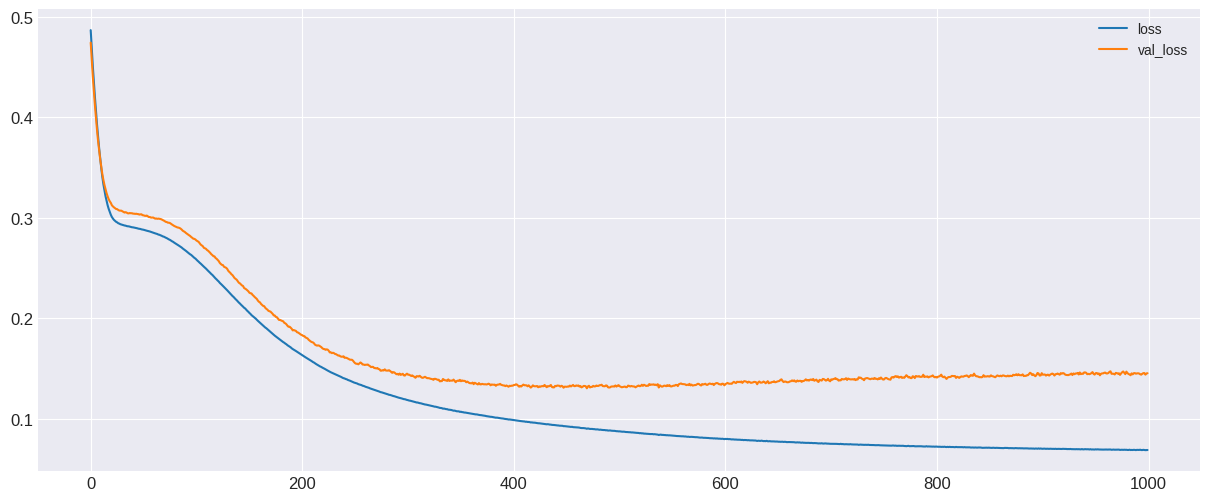

In [19]:
res_df.plot(y=['loss','val_loss'])

<Axes: >

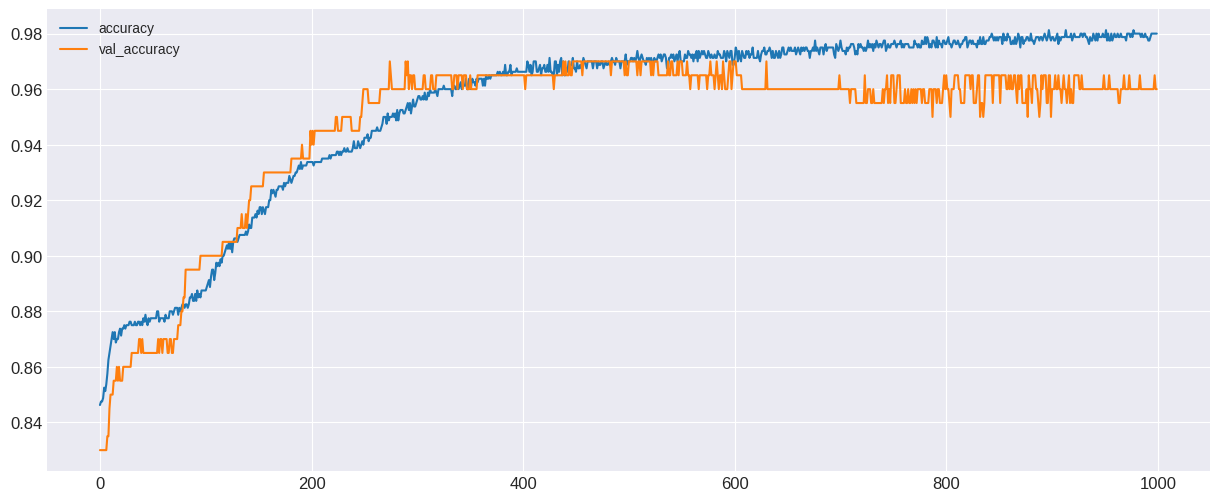

In [20]:
res_df.plot(y=['accuracy','val_accuracy'])

## Prediction

In [21]:
model.evaluate(X_train,y_train)

25/25 [==============================] - 0s 3ms/step - loss: 0.0686 - accuracy: 0.9800


[0.06855925917625427, 0.9800000190734863]

In [22]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1455 - accuracy: 0.9600


[0.1454991102218628, 0.9599999785423279]

### Prediction: Train 

In [23]:
y_pred = model.predict(X_train)
y_pred

25/25 [==============================] - 0s 3ms/step


array([[-3.401495 ,  4.4380946],
       [ 2.6905558, -3.3854814],
       [ 3.3935022, -4.395467 ],
       ...,
       [-2.4255288,  3.1350968],
       [-4.8564587,  4.5254235],
       [ 2.4827926, -1.1713797]], dtype=float32)

In [24]:
accuracy_score(np.argmax(y_pred,axis=1),y_train)

0.98

### Prediction: Test

In [25]:
y_pred = model.predict(X_test)
y_pred

7/7 [==============================] - 0s 2ms/step


array([[ 1.9342239e+00, -5.9888637e-01],
       [-1.0769845e+00,  2.1496708e+00],
       [ 8.0735290e-01,  4.1750753e-01],
       [ 5.1109209e+00, -3.7668514e+00],
       [ 1.9416754e+00, -2.8849034e+00],
       [ 3.4013891e+00, -4.3874912e+00],
       [ 2.4634132e+00, -1.0965686e+00],
       [ 6.2753177e+00, -5.1502280e+00],
       [ 3.5782428e+00, -2.1806178e+00],
       [ 2.4209988e+00, -3.3353629e+00],
       [ 6.1805558e+00, -5.1280951e+00],
       [ 7.8862000e-01, -1.8755064e+00],
       [ 2.0762962e-01,  9.0130562e-01],
       [ 5.5585742e-02,  9.3973386e-01],
       [-3.7309508e+00,  4.7489886e+00],
       [-4.0624199e+00,  2.7072253e+00],
       [-3.0730650e+00,  4.1282301e+00],
       [ 4.1490903e+00, -2.9936976e+00],
       [-1.1486225e+00,  2.3123896e+00],
       [ 3.5067737e+00, -2.1919992e+00],
       [-8.6873140e+00,  7.4418182e+00],
       [-7.0935273e-01,  1.0862145e+00],
       [ 3.5975239e-01, -4.0535629e-03],
       [-4.1925979e+00,  4.4563322e+00],
       [ 2.90655

In [26]:
accuracy_score(np.argmax(y_pred,axis=1),y_test)

0.96

## Decision Boundary

In [42]:
def fn_plot_decision_boundary(model,X_tr,y_tr,X_ts,y_ts):
    
    # Set min and max values and give it some padding
    xMin, xMax = X_tr[:, 0].min() - .05, X_tr[:, 0].max() + .05
    yMin, yMax = X_tr[:, 1].min() - .05, X_tr[:, 1].max() + .05
    
    # grid size for mesh grid
    h = 0.01
    
    # Generate a grid of points with distance 'h' between them
    xx, yy = np.meshgrid(np.arange(xMin, xMax, h), np.arange(yMin, yMax, h))
    
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis = 1)
    
    # Make its shape same as that of xx 
    Z = Z.reshape(xx.shape)

    fig = plt.figure()
    ax = fig.add_axes(111)
    
    # Now we have Z value corresponding to each of the combination of xx and yy
    # Plot the contour and training examples
    ax.contourf(xx, yy, Z, cmap=CMAP) #, alpha = 0.8
    
    # Plotting scatter for train data
    ax.scatter(X_tr[:, 0], X_tr[:, 1], c=y_tr,
                                  s=30, edgecolor='k', cmap=plt.cm.coolwarm)
    
    
    # Plotting scatter for test data
    ax.scatter(X_ts[:, 0], X_ts[:, 1], c=y_ts,
                                  s=150, marker = '*',edgecolor='k', cmap=plt.cm.inferno )

    
    

In [43]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

3377/3377 [==============================] - 8s 2ms/step


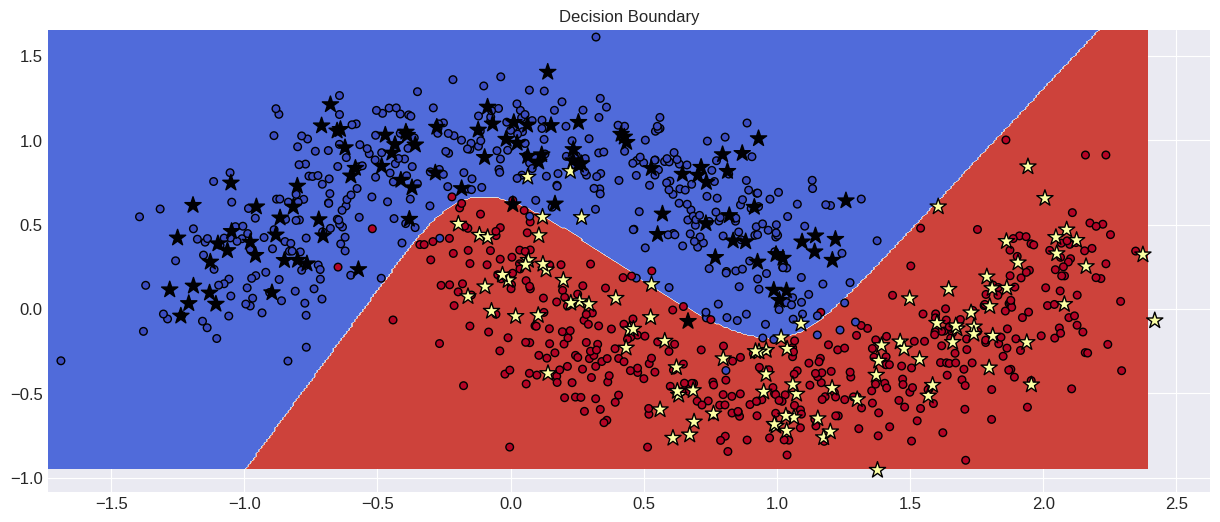

In [44]:
# loss_df = pd.DataFrame(hist)

fn_plot_decision_boundary(model, X_train, y_train, X_test, y_test) # plot decision boundary for this plot

plt.title("Decision Boundary");PuOr

## Tracking
<div style="font-family: Arial; font-size:1em;;">
Lets track the results across various implementations...

 |#|Implementation|Training Accuracy|Testing Accuracy|Remarks|
 |:-:|---|---|---|---|
 |1|Simple Perceptron|0.83111|0.89000||